# Linear Regression using ordinary least square

### Ordinary Least Square : When you have more than one variable then you can use this method to minimize the error of sum of residual square 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Linear regression

'''y= b0 + b1*x
Here b0 is deciding parameter and b1 coefficient 
which can be find out using the formula as,

b1= (x-mean_x) * (y-mean_y)/(x - mean_x)**2
b0= mean_y - b1*x 

'''

'y= b0 + b1*x\nHere b0 is deciding parameter and b1 coefficient \nwhich can be find out using the formula as,\n\nb1= (x-mean_x) * (y-mean_y)/(x - mean_x)**2\nb0= mean_y - b1*x \n\n'

In [3]:
#Data Loading ....
df = pd.read_excel('height_wt.xlsx')
df.head(5)

,Height,Male
0,NaN,NaN
1,(137 cm),(28.5/34.9 kg)
2,4′ 7″,68/84 lb
3,NaN,NaN
4,(140 cm),(30.8/38.1 kg)


In [4]:
#dropping na values
df.dropna(inplace=True)

In [5]:
# Taking height in only in cm

df['Height']= df['Height'].apply(lambda x : int(x.split(' ')[0][1:5]) if 'cm' in x else 'NA')

In [6]:
index_name = df[df['Height']=='NA'].index

In [7]:
# dropping uneccessary rows
df.drop(index_name , inplace= True)

In [8]:
df.head(5)

,Height,Male
1,137,(28.5/34.9 kg)
4,140,(30.8/38.1 kg)
7,142,(33.5/40.8 kg)
10,145,(35.8/43.9 kg)
13,147,(38.5/46.7 kg)


In [9]:
# Taking only float values
df['Male'] = df['Male'].apply(lambda x : float(x.split('/')[0][1:]))

In [10]:
# renamming columns
df.rename(columns = {'Height':'Height (cm)','Male': 'Male_Wt (kg)'},inplace=True)

In [11]:
# ressetting index and dropping index column
df.reset_index(inplace=True)
df.drop('index',inplace=True,axis=1)

In [12]:
X = df['Height (cm)'] #independent variable 

Y= df['Male_Wt (kg)'] #dependent variable

In [13]:
mean_x = np.mean(X) # Mean of independent variable
mean_y = np.mean(Y) # Mean of dependable variable
def regression(X,Y):
    num = 0
    deno =0
    
    for i in range(len(X)):
        num +=(X[i] - mean_x) * (Y[i]- mean_y) #aggregating values
        deno += (X[i] - mean_x)**2 
    b1 = num/deno      
    b0 = mean_y - (b1 * mean_x) 
    
    return b1,b0

regression = regression(X,Y)
m,b = regression
print(f'Slope m = {m} ,Constant b = {b}')

''' Male WT = -104.44 + 0.96 * Height'''

Slope m = 0.9689771104774377 ,Constant b = -104.44018419008023


' Male WT = -104.44 + 0.96 * Height'

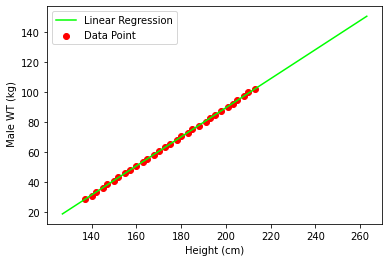

In [14]:
#plotting values 
max_x = np.max(X) + 50
min_x = np.min(X) -10

#calculating line values of x and y
x = np.linspace(min_x, max_x, 1000)
y = b + m * x

#plotting line 
plt.plot(x, y, color='#00ff00', label='Linear Regression')

#plot the data point
plt.scatter(X, Y, color='#ff0000', label='Data Point')

# x-axis label
plt.xlabel('Height (cm)')

#y-axis label
plt.ylabel(' Male WT (kg)')
plt.legend()


In [15]:
# root mean square error 
'''Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals 
are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these 
residuals are. In other words, it tells you how concentrated the data is around the line of best fit.
'''
rmse = 0
for i in range(len(X)):
    y_pred=  b + m* X[i]
    rmse += (Y[i] - y_pred) ** 2
    
rmse = np.sqrt(rmse/len(X))
print(rmse)


0.3652304852959355


In [16]:
# coeefficient of determination

sumofsquares = 0
sumofresiduals = 0
for i in range(len(X)) :
    y_pred = b + m * X[i]
    sumofsquares += (Y[i] - mean_y) ** 2
    sumofresiduals += (Y[i] - y_pred) **2
    
score  = 1 - (sumofresiduals/sumofsquares)
print(score)


0.9997223871063475


In [17]:
print('you cann observe that we have got the nice accuracy because we have less data')

you cann observe that we have got the nice accuracy because we have less data
